In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [171]:
# 1. Read CSV file and set datetime index.

df = pd.read_csv('bus_1_load_copy.csv')
start_date = '01-01-2018'
datetime_index = pd.date_range(start=start_date, periods=len(df), freq='h')
df.index = datetime_index

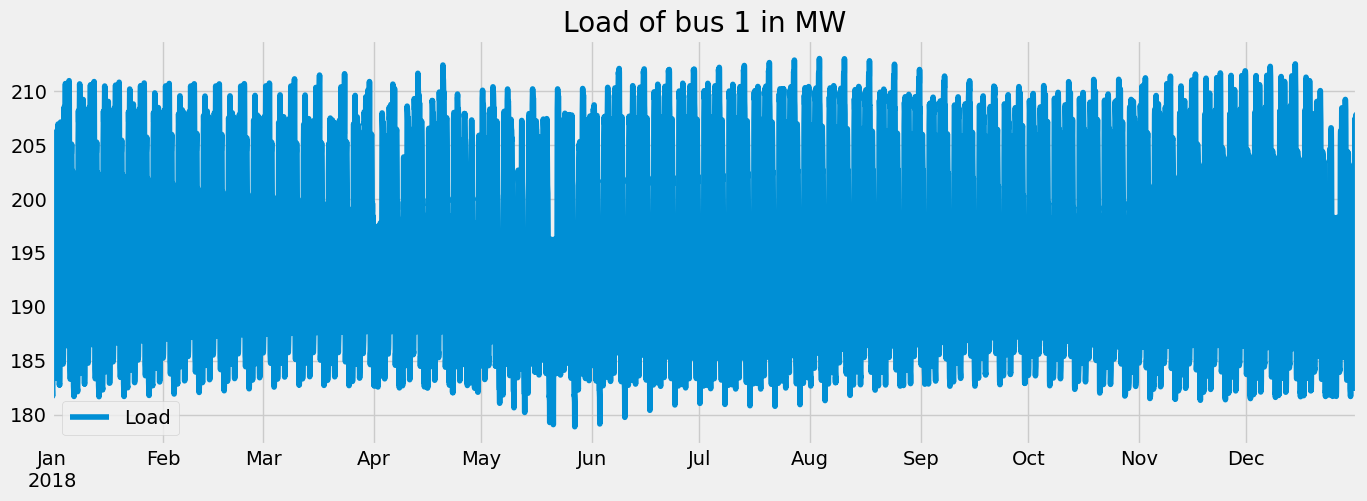

In [172]:
# 1. Plot result
df.plot(style='-', 
        figsize=(15, 5), 
        color=color_pal[0], 
        title='Load of bus 1 in MW')
plt.show()

In [173]:
# # train = df.loc[df.index < '09-01-2018']     # Month-day-year
# train = df.loc[(df.index < '09-01-2018')] # | ((df.index >= '9-30-2018') & (df.index < '10-01-2018'))]
# validation = df.loc[(df.index >= '09-01-2018') & (df.index < '9-30-2018')]
# test = df.loc[df.index >= '10-01-2018']     # Index 6554

# # fig, ax = plt.subplots(figsize=(15, 5))
# # train.plot(ax=ax, label='Training Set', title='Data Train/Test')
# # test.plot(ax=ax, label='Test Set')
# # ax.axvline('09-01-2018', color='black', ls='-')
# # ax.legend(['Training Set', 'Test Set'])
# # plt.show()

# fig, ax = plt.subplots(figsize=(15, 5))
# train['Load'].plot(ax=ax, label='Training Set', title='Data Train/Validation/Test')
# validation['Load'].plot(ax=ax, label='Validation Set')
# test['Load'].plot(ax=ax, label='Test Set')
# ax.axvline('09-01-2018', color='black', ls='--')
# ax.axvline('10-01-2018', color='black', ls='--')
# ax.legend(['Training Set', 'Validation Set', 'Test Set', 'Validation Split', 'Test Split'])
# plt.show()

# # print(train)
# # train.to_csv('run-train.csv')
# # validation.to_csv('run-validation.csv')
# test.to_csv('run-test.csv')

In [174]:
# Feature creation
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    return df

df = create_features(df)
# df

In [175]:
# Lag features
def add_lags(df):
    target_map = df['Load'].to_dict()

    df['lag1'] = (df.index - pd.Timedelta('1 hour')).map(target_map)
    df['lag24'] = (df.index - pd.Timedelta('24 hour')).map(target_map)
    df['lag100'] = (df.index - pd.Timedelta('3 days')).map(target_map)
    df['lag104'] = (df.index - pd.Timedelta('7 days')).map(target_map)
    df['lag105'] = (df.index - pd.Timedelta('14 days')).map(target_map)
    


    
    # df['lag1'] = (df.index - pd.Timedelta('1 hour')).map(target_map)
    # df['lag2'] = (df.index - pd.Timedelta('2 hour')).map(target_map)
    # df['lag3'] = (df.index - pd.Timedelta('3 hour')).map(target_map)
    # df['lag4'] = (df.index - pd.Timedelta('4 hour')).map(target_map)
    # df['lag5'] = (df.index - pd.Timedelta('5 hour')).map(target_map)
    # df['lag6'] = (df.index - pd.Timedelta('6 hour')).map(target_map)
    # df['lag7'] = (df.index - pd.Timedelta('7 hour')).map(target_map)
    # df['lag8'] = (df.index - pd.Timedelta('8 hour')).map(target_map)
    # df['lag9'] = (df.index - pd.Timedelta('9 hour')).map(target_map)

    # df['lag10'] = (df.index - pd.Timedelta('10 hour')).map(target_map)
    # df['lag11'] = (df.index - pd.Timedelta('11 hour')).map(target_map)
    # df['lag12'] = (df.index - pd.Timedelta('12 hour')).map(target_map)
    # df['lag13'] = (df.index - pd.Timedelta('13 hour')).map(target_map)
    # df['lag14'] = (df.index - pd.Timedelta('14 hour')).map(target_map)
    # df['lag15'] = (df.index - pd.Timedelta('15 hour')).map(target_map)
    # df['lag16'] = (df.index - pd.Timedelta('16 hour')).map(target_map)
    # df['lag17'] = (df.index - pd.Timedelta('17 hour')).map(target_map)
    # df['lag18'] = (df.index - pd.Timedelta('18 hour')).map(target_map)
    # df['lag19'] = (df.index - pd.Timedelta('19 hour')).map(target_map)

    # df['lag20'] = (df.index - pd.Timedelta('20 hour')).map(target_map)
    # df['lag21'] = (df.index - pd.Timedelta('21 hour')).map(target_map)
    # df['lag22'] = (df.index - pd.Timedelta('22 hour')).map(target_map)
    # df['lag23'] = (df.index - pd.Timedelta('23 hour')).map(target_map)
    # df['lag24'] = (df.index - pd.Timedelta('24 hour')).map(target_map)
    # df['lag25'] = (df.index - pd.Timedelta('25 hour')).map(target_map)
    # df['lag26'] = (df.index - pd.Timedelta('26 hour')).map(target_map)
    # df['lag27'] = (df.index - pd.Timedelta('27 hour')).map(target_map)
    # df['lag28'] = (df.index - pd.Timedelta('28 hour')).map(target_map)
    # df['lag29'] = (df.index - pd.Timedelta('29 hour')).map(target_map)

    # df['lag30'] = (df.index - pd.Timedelta('30 hour')).map(target_map)
    # df['lag31'] = (df.index - pd.Timedelta('31 hour')).map(target_map)
    # df['lag32'] = (df.index - pd.Timedelta('32 hour')).map(target_map)
    # df['lag33'] = (df.index - pd.Timedelta('33 hour')).map(target_map)
    # df['lag34'] = (df.index - pd.Timedelta('34 hour')).map(target_map)
    # df['lag35'] = (df.index - pd.Timedelta('35 hour')).map(target_map)
    # df['lag36'] = (df.index - pd.Timedelta('36 hour')).map(target_map)
    # df['lag37'] = (df.index - pd.Timedelta('37 hour')).map(target_map)
    # df['lag38'] = (df.index - pd.Timedelta('38 hour')).map(target_map)
    # df['lag39'] = (df.index - pd.Timedelta('39 hour')).map(target_map)

    # df['lag40'] = (df.index - pd.Timedelta('40 hour')).map(target_map)
    # df['lag41'] = (df.index - pd.Timedelta('41 hour')).map(target_map)
    # df['lag42'] = (df.index - pd.Timedelta('42 hour')).map(target_map)
    # df['lag43'] = (df.index - pd.Timedelta('43 hour')).map(target_map)
    # df['lag44'] = (df.index - pd.Timedelta('44 hour')).map(target_map)
    # df['lag45'] = (df.index - pd.Timedelta('45 hour')).map(target_map)
    # df['lag46'] = (df.index - pd.Timedelta('46 hour')).map(target_map)
    # df['lag47'] = (df.index - pd.Timedelta('47 hour')).map(target_map)
    # df['lag48'] = (df.index - pd.Timedelta('48 hour')).map(target_map)
    # df['lag49'] = (df.index - pd.Timedelta('49 hour')).map(target_map)

    # df['lag50'] = (df.index - pd.Timedelta('50 hour')).map(target_map)
    # df['lag51'] = (df.index - pd.Timedelta('51 hour')).map(target_map)
    # df['lag52'] = (df.index - pd.Timedelta('52 hour')).map(target_map)
    # df['lag53'] = (df.index - pd.Timedelta('53 hour')).map(target_map)
    # df['lag54'] = (df.index - pd.Timedelta('54 hour')).map(target_map)
    # df['lag55'] = (df.index - pd.Timedelta('55 hour')).map(target_map)
    # df['lag56'] = (df.index - pd.Timedelta('56 hour')).map(target_map)
    # df['lag57'] = (df.index - pd.Timedelta('57 hour')).map(target_map)
    # df['lag58'] = (df.index - pd.Timedelta('58 hour')).map(target_map)
    # df['lag59'] = (df.index - pd.Timedelta('59 hour')).map(target_map)
   

    # df['lag100'] = (df.index - pd.Timedelta('3 days')).map(target_map)
    # df['lag101'] = (df.index - pd.Timedelta('4 days')).map(target_map)
    # df['lag102'] = (df.index - pd.Timedelta('5 days')).map(target_map)
    # df['lag103'] = (df.index - pd.Timedelta('6 days')).map(target_map)
    # df['lag104'] = (df.index - pd.Timedelta('7 days')).map(target_map)
    # df['lag105'] = (df.index - pd.Timedelta('14 days')).map(target_map)
    # df['lag106'] = (df.index - pd.Timedelta('21 days')).map(target_map)
    # df['lag107'] = (df.index - pd.Timedelta('28 days')).map(target_map)
    # df['lag108'] = (df.index - pd.Timedelta('31 days')).map(target_map)
    return df
df = add_lags(df)
# df

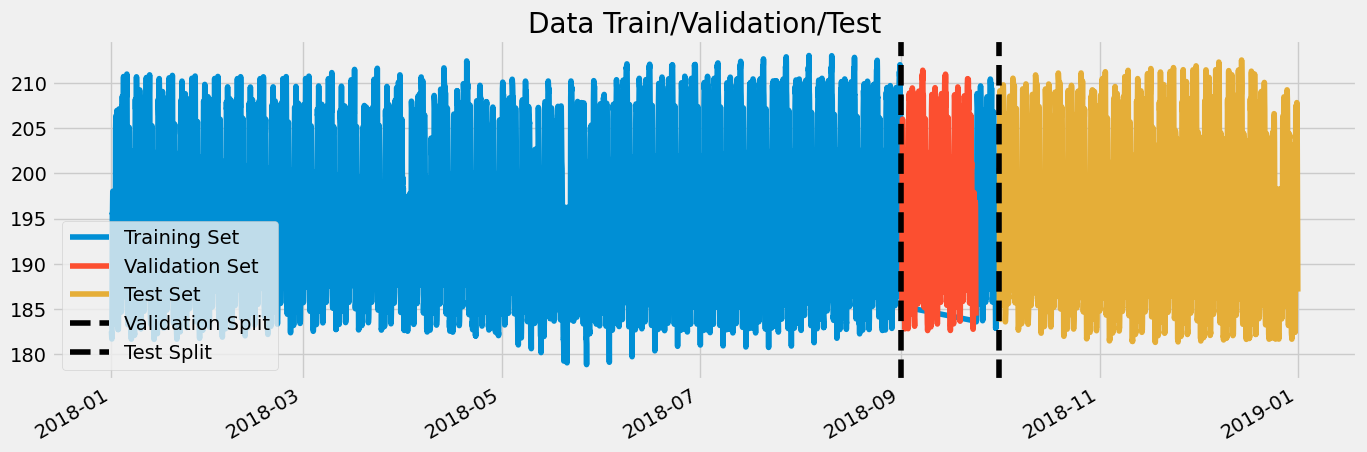

In [176]:
# train = df.loc[df.index < '09-01-2018']     # Month-day-year
# validation = df.loc[(df.index >= '09-01-2018') & (df.index < '10-01-2018')]

# train = df.loc[(df.index < '09-01-2018') | ((df.index >= '9-30-2018') & (df.index < '10-01-2018'))]           # Train including last 24 hours before test start
# validation = df.loc[(df.index >= '09-01-2018') & (df.index < '10-01-2018')]

train = df.loc[(df.index < '09-01-2018') | ((df.index >= '9-24-2018') & (df.index < '10-01-2018'))]           # Train including last 7 days before test start
validation = df.loc[(df.index >= '09-01-2018') & (df.index < '9-24-2018')]

test = df.loc[(df.index >= '10-01-2018')] # & (df.index < '12-31-2018')]     # Index 6554

# fig, ax = plt.subplots(figsize=(15, 5))
# train.plot(ax=ax, label='Training Set', title='Data Train/Test')
# test.plot(ax=ax, label='Test Set')
# ax.axvline('09-01-2018', color='black', ls='-')
# ax.legend(['Training Set', 'Test Set'])
# plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
train['Load'].plot(ax=ax, label='Training Set', title='Data Train/Validation/Test')
validation['Load'].plot(ax=ax, label='Validation Set')
test['Load'].plot(ax=ax, label='Test Set')
ax.axvline('09-01-2018', color='black', ls='--')
ax.axvline('10-01-2018', color='black', ls='--')
ax.legend(['Training Set', 'Validation Set', 'Test Set', 'Validation Split', 'Test Split'])
plt.show()

# print(train)
train.to_csv('run-train.csv')
validation.to_csv('run-validation.csv')
test.to_csv('run-test.csv')

In [177]:
# Create the model
train = create_features(train)
# print(train)
validation = create_features(validation)
# print(validation)
test = create_features(test)
# print(test)

FEATURES = ['lag104', 'lag1', 'lag24', 'lag100', 'lag105']




# FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10'\
#             , 'lag11', 'lag12', 'lag13', 'lag14', 'lag15', 'lag16', 'lag17', 'lag18', 'lag19', 'lag20'\
#                 , 'lag21', 'lag22', 'lag23', 'lag24', 'lag25', 'lag26', 'lag27', 'lag28', 'lag29', 'lag30'\
#                     , 'lag31', 'lag32', 'lag33', 'lag34', 'lag35', 'lag36', 'lag37', 'lag38', 'lag39', 'lag40'\
#                         , 'lag41', 'lag42', 'lag43', 'lag44', 'lag45', 'lag46', 'lag47', 'lag48', 'lag49', 'lag50'\
#                             , 'lag51', 'lag52', 'lag53', 'lag54', 'lag55', 'lag56', 'lag57', 'lag58', 'lag59', \
#                                 'lag100', 'lag101', 'lag102', 'lag103', 'lag104', 'lag105', 'lag106', 'lag107', 'lag108']
TARGET = 'Load'

X_train = train[FEATURES]
# print(X_train)
y_train = train[TARGET]
# print(y_train)

X_val = validation[FEATURES]
y_val = validation[TARGET]
# print(y_val)

X_test = test[FEATURES]
y_test = test[TARGET]
# print(y_test)

# print(train)
X_train.to_csv('run-X_train.csv')
y_train.to_csv('run-y_train.csv')

X_val.to_csv('run-X_val.csv')
y_val.to_csv('run-y_val.csv')

X_test.to_csv('run-X_test.csv')
y_test.to_csv('run-y_test.csv')

In [178]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    # Base_score is initial value 
                       n_estimators=1000,                   # The amount of trees the algorithm will create
                       early_stopping_rounds=50,            # If the model doesn't improve, stop early
                       objective='reg:squarederror',        # Regression with squared loss
                       max_depth=3,                         # Max depth of trees. Used to be 3. Default is 6
                       learning_rate=0.1)                   # Low learning rate, so the model doesn't overfit too quickly. Used to be 0.01. Default is 0.3
reg.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],      # Removed eval_metric='rmse'
    verbose=50                      # Frequency of printing validation
)


[0]	validation_0-rmse:177.39285
[50]	validation_0-rmse:1.22115
[100]	validation_0-rmse:0.74382


[150]	validation_0-rmse:0.67076
[200]	validation_0-rmse:0.62989
[250]	validation_0-rmse:0.60207
[300]	validation_0-rmse:0.58509
[350]	validation_0-rmse:0.57449
[400]	validation_0-rmse:0.56476
[450]	validation_0-rmse:0.55079
[500]	validation_0-rmse:0.54652
[550]	validation_0-rmse:0.53922
[600]	validation_0-rmse:0.53111
[650]	validation_0-rmse:0.52652
[700]	validation_0-rmse:0.52220
[750]	validation_0-rmse:0.51790
[800]	validation_0-rmse:0.51623
[850]	validation_0-rmse:0.51129
[900]	validation_0-rmse:0.51039
[950]	validation_0-rmse:0.51179
[999]	validation_0-rmse:0.50765


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

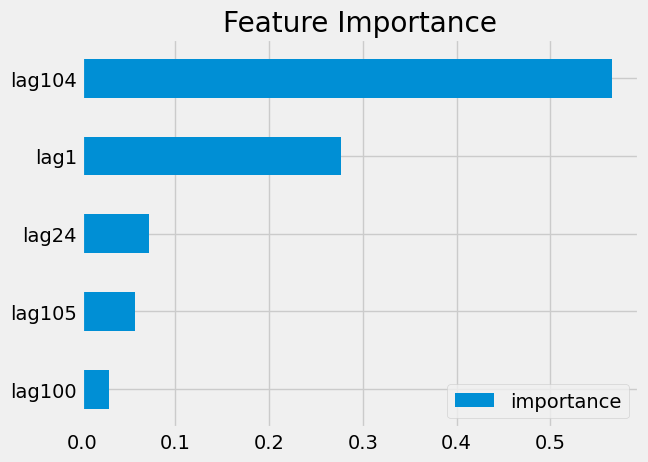

        importance
lag104    0.565881
lag1      0.276789
lag24     0.071843
lag105    0.056751
lag100    0.028737


In [179]:
# Feature importance
fi = pd.DataFrame(data=reg.feature_importances_,        # feature_importances_ is a standard function of "reg"
             index=reg.feature_names_in_,
             columns=['importance'])

fi.sort_values('importance').plot(kind='barh', title='Feature Importance')  # Sort by importance
plt.show()
fi.to_csv('feature_importance.csv')



# Sort the DataFrame by importance in descending order
fi_sorted = fi.sort_values('importance', ascending=False)
fi_sorted.to_csv('feature_importance_sorted.csv')
# Display the first few rows of the sorted DataFrame
print(fi_sorted.head())

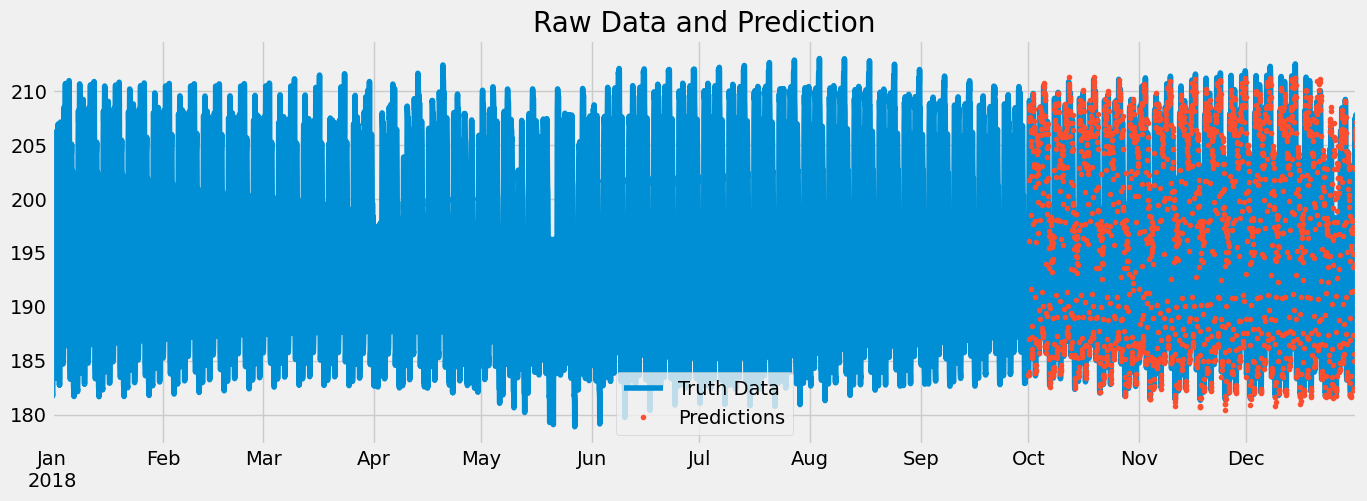

In [180]:
# Forecast on test
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Load']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

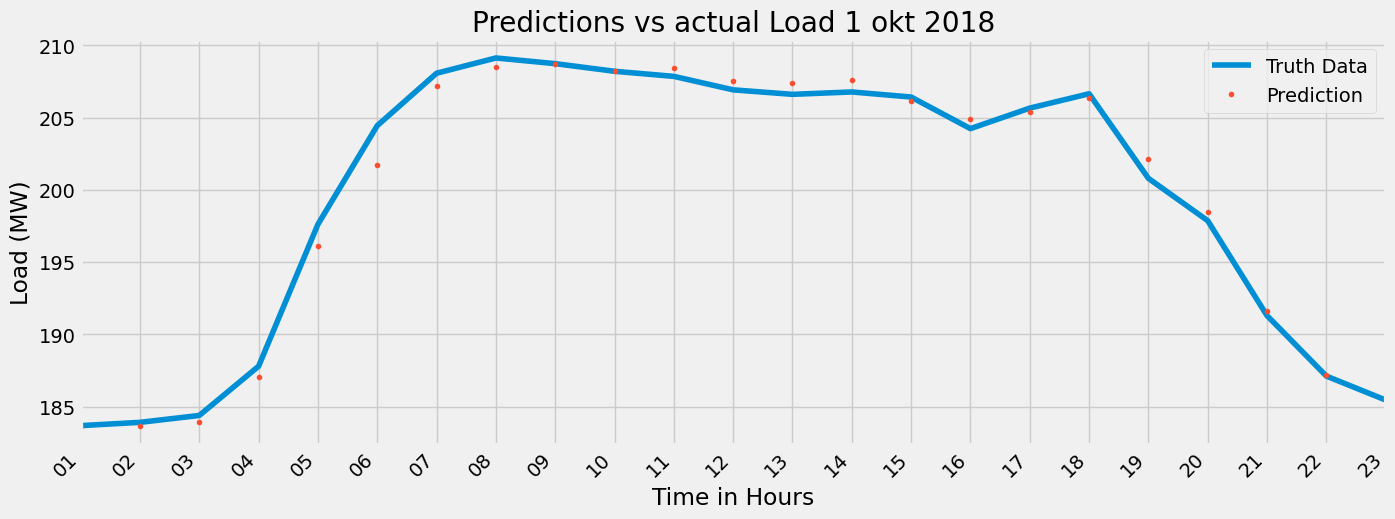

In [181]:
# Visualize one month of actual values vs predictions
# ax = df.loc[(df.index > '10-01-2018') & (df.index < '10-4-2018')]['Load'] \
#     .plot(figsize=(15, 5), title='3 days of data')
# df.loc[(df.index > '10-01-2018') & (df.index < '10-4-2018')]['prediction'] \
#     .plot(style='.')
# plt.legend(['Truth Data','Prediction'])
# plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a DateTime index and columns 'Load' and 'prediction'

# Define the date range for the plot
start_date = '2018-10-01'
end_date = '2018-10-02'

# Filter the data for the specified date range
subset = df.loc[(df.index > start_date) & (df.index < end_date)]

# Plot the Load data
ax = subset['Load'].plot(figsize=(15, 5), title='Predictions vs actual Load 1 okt 2018')

# Plot the Prediction data
subset['prediction'].plot(style='.', ax=ax)

# Set the legend
plt.legend(['Truth Data', 'Prediction'])

# Set the x-ticks and x-tick labels
xticks = subset.index[::1]  # For example, take every 6th index as a tick
ax.set_xticks(xticks)
ax.set_xticklabels(xticks.strftime('%H'), rotation=45, ha='right')     # ('%m-%d %H:%M')

# Set the x and y axis labels
ax.set_xlabel('Time in Hours')
ax.set_ylabel('Load (MW)')
# Show the plot
plt.show()


In [182]:
# Calculate Mean Squared Error
score = np.sqrt(mean_squared_error(test['Load'], test['prediction']))**2
print(f'MSE Score on Test set: {score:0.2f}')      # Two decimal points

MSE Score on Test set: 1.25


In [183]:
# Calculate the error
test['error'] = np.abs(test[TARGET] - test['prediction'])   # Absolute error 
# test['error'] = mean_squared_error(test[TARGET], test['prediction'])
test['date'] = test.index.date                              # Each date its own column
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)        # Worst predictions in desceding order

date
2018-12-25    4.335847
2018-12-26    3.208056
2018-12-24    1.675415
2018-10-30    1.619297
2018-10-29    1.432688
2018-10-28    1.429249
2018-12-20    1.191123
2018-12-21    1.190555
2018-11-02    1.157337
2018-11-03    1.119893
Name: error, dtype: float64